In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
from plotnine import ggsave

problem statement:
                  Predict the success rate of a new shop or to build a model to predict the accurate location which expects a new shop for a particular domain.

**DATASET**

In [ ]:
df=pd.read_csv("Global_Superstore2.csv",encoding = "ISO-8859-1", engine='python')
df

In [ ]:
df.describe()


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

**DATA CLEANING & PREPROCESSING:**

drop the unwanted columns

In [ ]:
df['normProfit'] = (df['Profit'] - df['Profit'].min()) / (df['Profit'].max() - df['Profit'].min())
df['normSales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
df=df.drop(columns=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Postal Code','Product ID','Product Name','Order Priority','Sales','Profit'])
df_analysis=df
df

**Check for null values**

In [ ]:
df.isnull().any()

Order Date       False
City             False
State            False
Country          False
Market           False
Region           False
Category         False
Sub-Category     False
Quantity         False
Discount         False
Shipping Cost    False
normProfit       False
normSales        False
dtype: bool

In [ ]:
df.isnull().sum()

Order Date       0
City             0
State            0
Country          0
Market           0
Region           0
Category         0
Sub-Category     0
Quantity         0
Discount         0
Shipping Cost    0
normProfit       0
normSales        0
dtype: int64

In [ ]:
df.describe()
print(df.head())

   Order Date           City            State        Country  Market   Region  \
0  31-07-2012  New York City         New York  United States      US     East   
1  05-02-2013     Wollongong  New South Wales      Australia    APAC  Oceania   
2  17-10-2013       Brisbane       Queensland      Australia    APAC  Oceania   
3  28-01-2013         Berlin           Berlin        Germany      EU  Central   
4  05-11-2013          Dakar            Dakar        Senegal  Africa   Africa   

     Category Sub-Category  Quantity  Discount  Shipping Cost  normProfit  \
0  Technology  Accessories         7       0.0         933.57    0.490812   
1   Furniture       Chairs         9       0.1         923.63    0.420749   
2  Technology       Phones         9       0.1         915.49    0.501331   
3  Technology       Phones         5       0.1         910.16    0.433564   
4  Technology      Copiers         8       0.0         903.04    0.460768   

   normSales  
0   0.102006  
1   0.163837  
2   0

**considering an entire city's sales in a day as an instance in the dataset (grouping the data)**

In [ ]:
df['date']=[i.split('-')[0] for i in df['Order Date']]
df_analysis=pd.DataFrame(df.groupby(['City','Category'],axis=0).agg({'Shipping Cost': 'mean','Discount':'max','Quantity':'sum','normProfit':'mean','normSales':'mean'}))
df_analysis

Shipping Cost  Discount  Quantity  \
City                  Category                                             
Aachen                Furniture            47.675000       0.1        10   
                      Office Supplies      20.887143       0.1        49   
                      Technology            3.510000       0.0         1   
Aalen                 Furniture            81.970000       0.1         3   
Aalst                 Furniture             4.030000       0.0         4   
...                                              ...       ...       ...   
Zwedru                Office Supplies       3.090000       0.0         1   
Zwickau               Office Supplies       2.436667       0.0         8   
Zwolle                Office Supplies      12.190000       0.5        10   
eMbalenhle            Office Supplies       4.695000       0.0         4   
Águas Lindas de Goiás Office Supplies       6.837500       0.0        10   

                                       normProfit  normSales  
City                  Category                                
Aachen                Furniture          0.453206   0.034714  
                      Office Supplies    0.443363   0.006860  
                      Technology         0.440966   0.002191  
Aalen                 Furniture          0.458867   0.043257  
Aalst                 Furniture          0.442136   0.002811  
...                                           ...        ...  
Zwedru                Office Supplies    0.440790   0.002163  
Zwickau               Office Supplies    0.440431   0.001439  
Zwolle                Office Supplies    0.438163   0.003306  
eMbalenhle            Office Supplies    0.440454   0.001657  
Águas Lindas de Goiás Office Supplies    0.440684   0.002045  

[8079 rows x 5 columns]

In [ ]:
#df_analysis.to_csv('/content/drive/My Drive/datapred.csv', encoding='utf-8', index=False)

In [ ]:
df_analysis.describe

<bound method NDFrame.describe of                                        Shipping Cost  Discount  Quantity  \
City                  Category                                             
Aachen                Furniture            47.675000       0.1        10   
                      Office Supplies      20.887143       0.1        49   
                      Technology            3.510000       0.0         1   
Aalen                 Furniture            81.970000       0.1         3   
Aalst                 Furniture             4.030000       0.0         4   
...                                              ...       ...       ...   
Zwedru                Office Supplies       3.090000       0.0         1   
Zwickau               Office Supplies       2.436667       0.0         8   
Zwolle                Office Supplies      12.190000       0.5        10   
eMbalenhle            Office Supplies       4.695000       0.0         4   
Águas Lindas de Goiás Office Supplies       6.837500  

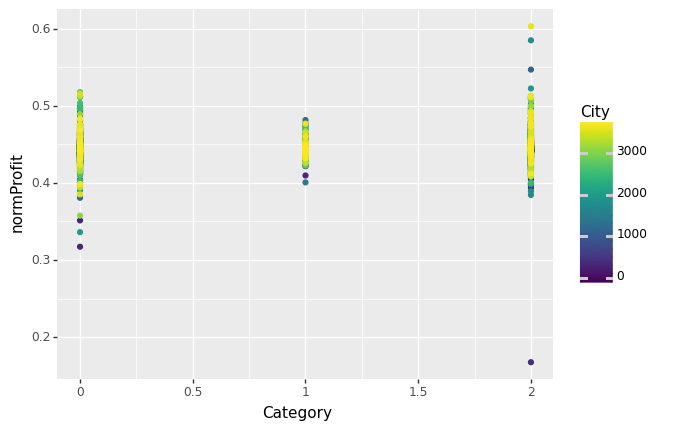

<ggplot: (8742779968201)>

In [ ]:
from plotnine import ggplot, aes, geom_bar,geom_point

(ggplot(df_analysis)
+ aes(x="Category",y="normProfit",color="City")
+  geom_point())


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.


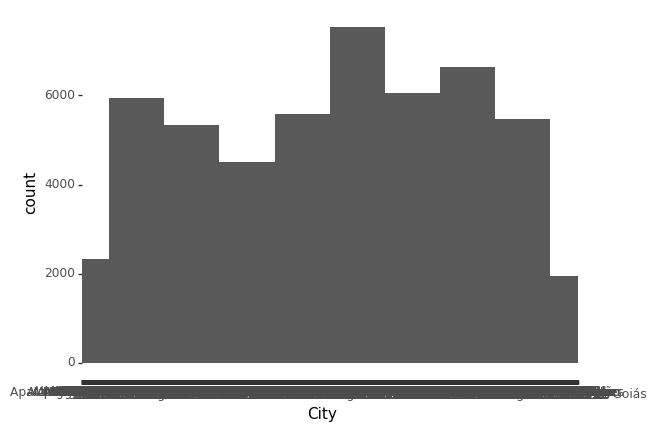

<ggplot: (8742782016581)>

In [ ]:
from plotnine import ggplot, aes, geom_bar,geom_point,stat_bin
ggplot(df) + aes(x=("City")) + stat_bin(bins=10) + geom_bar()


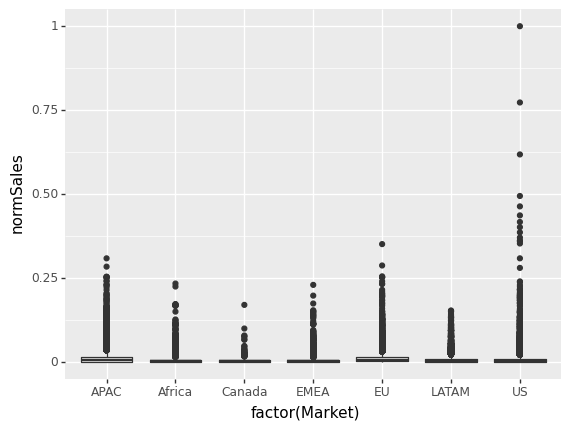

<ggplot: (8742782041921)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(df)
  + aes(x="factor(Market)", y="normSales")
  + geom_boxplot()
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.


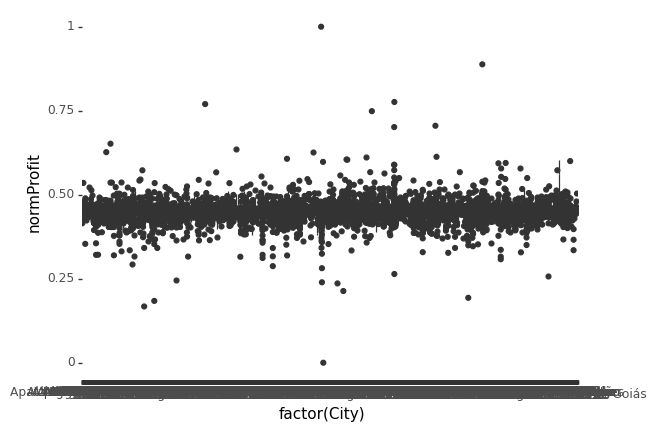

<ggplot: (8742782674069)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(df)
  + aes(x="factor(City)", y="normProfit")
  + geom_boxplot()
)

In [ ]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import LabelEncoder
# df = df.apply(LabelEncoder().fit_transform)
# df.head()

In [ ]:
print(df_analysis.head())

                        Shipping Cost  Discount  Quantity  normProfit  \
City   Category                                                         
Aachen Furniture            47.675000       0.1        10    0.453206   
       Office Supplies      20.887143       0.1        49    0.443363   
       Technology            3.510000       0.0         1    0.440966   
Aalen  Furniture            81.970000       0.1         3    0.458867   
Aalst  Furniture             4.030000       0.0         4    0.442136   

                        normSales  
City   Category                    
Aachen Furniture         0.034714  
       Office Supplies   0.006860  
       Technology        0.002191  
Aalen  Furniture         0.043257  
Aalst  Furniture         0.002811  


In [ ]:
from google.colab import drive
drive.mount('drive')


In [ ]:
#df_analysis.to_csv('/content/drive/My Drive/datapred.csv', encoding='utf-8', index=False)

Creation of a new attribute to predict th success rate of the existing stores

**Formulating a formula for success rate with available features:**


1.   Success rate is directly proportional to the total profit earned
2.   Success rate is directly proportional to the total sales price



In [ ]:
df_analysis['sucessrate']= (df_analysis['normProfit']*df_analysis['normSales']/(df_analysis['normProfit'].max()*df_analysis['normSales'].max()))
print(df_analysis['sucessrate'].max())
df_analysis.head()

1.0


Shipping Cost  Discount  Quantity  normProfit  \
City   Category                                                         
Aachen Furniture            47.675000       0.1        10    0.453206   
       Office Supplies      20.887143       0.1        49    0.443363   
       Technology            3.510000       0.0         1    0.440966   
Aalen  Furniture            81.970000       0.1         3    0.458867   
Aalst  Furniture             4.030000       0.0         4    0.442136   

                        normSales  sucessrate  
City   Category                                
Aachen Furniture         0.034714    0.091701  
       Office Supplies   0.006860    0.017729  
       Technology        0.002191    0.005631  
Aalen  Furniture         0.043257    0.115696  
Aalst  Furniture         0.002811    0.007244

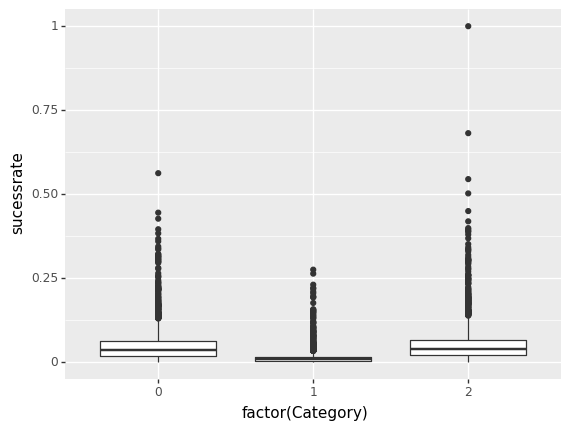

<ggplot: (8742782667125)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(df_analysis)
  + aes(x="factor(Category)", y="sucessrate")
  + geom_boxplot()
)

heatmap to infer the distribution of the data points

Text(0.5, 1.0, 'city')

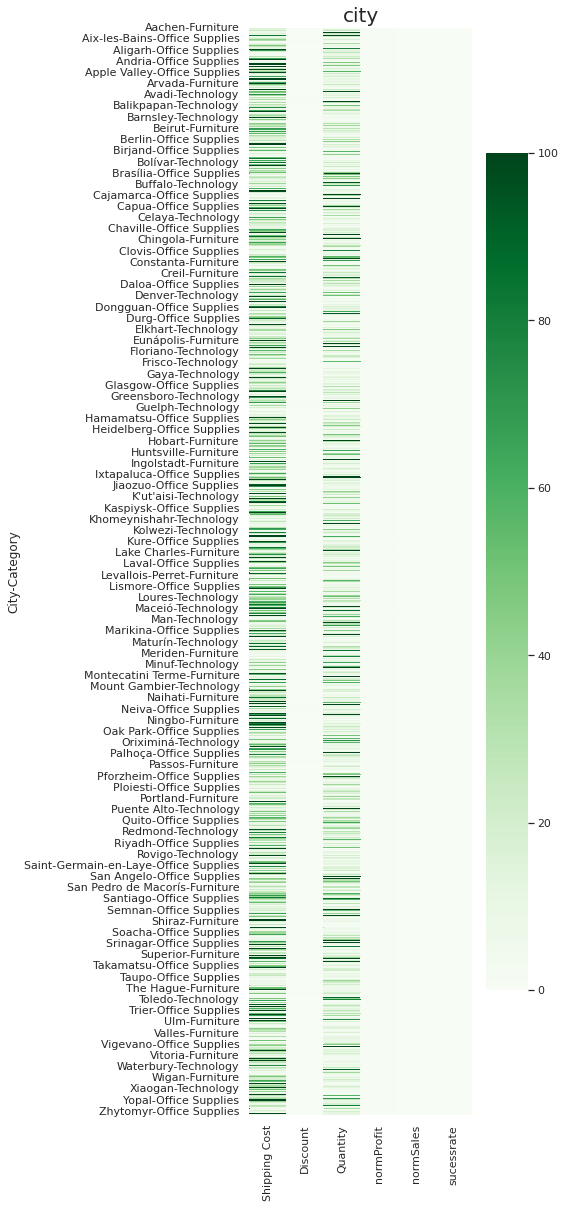

In [ ]:
sns.set(rc = {'figure.figsize':(5,20)})
sns.heatmap(df_analysis,cmap="Greens",vmin=0,vmax=100).set_title("city",fontsize=20)

In [ ]:
# df1=df
# df_analysis=pd.DataFrame(df.groupby(['City','Category'],axis=0).sum())
# df1

In [ ]:
# sns.set(rc = {'figure.figsize':(5,500)})
# sns.heatmap(df_analysis,cmap="Blues",vmin=0,vmax=50000).set_title("cities report",fontsize=20)

In [ ]:
df_analysis.head()

Shipping Cost  Discount  Quantity  normProfit  \
City   Category                                                         
Aachen Furniture            47.675000       0.1        10    0.453206   
       Office Supplies      20.887143       0.1        49    0.443363   
       Technology            3.510000       0.0         1    0.440966   
Aalen  Furniture            81.970000       0.1         3    0.458867   
Aalst  Furniture             4.030000       0.0         4    0.442136   

                        normSales  sucessrate  
City   Category                                
Aachen Furniture         0.034714    0.091701  
       Office Supplies   0.006860    0.017729  
       Technology        0.002191    0.005631  
Aalen  Furniture         0.043257    0.115696  
Aalst  Furniture         0.002811    0.007244

In [ ]:
df_analysis.reset_index(inplace = True)
df_analysis.head()

City         Category  Shipping Cost  Discount  Quantity  normProfit  \
0  Aachen        Furniture      47.675000       0.1        10    0.453206   
1  Aachen  Office Supplies      20.887143       0.1        49    0.443363   
2  Aachen       Technology       3.510000       0.0         1    0.440966   
3   Aalen        Furniture      81.970000       0.1         3    0.458867   
4   Aalst        Furniture       4.030000       0.0         4    0.442136   

   normSales  sucessrate  
0   0.034714    0.091701  
1   0.006860    0.017729  
2   0.002191    0.005631  
3   0.043257    0.115696  
4   0.002811    0.007244

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
# from plotnine import ggsave
from sklearn import svm
from sklearn.model_selection import train_test_split
df_analysis

Shipping Cost  Discount  Quantity  \
City                  Category                                             
Aachen                Furniture            47.675000       0.1        10   
                      Office Supplies      20.887143       0.1        49   
                      Technology            3.510000       0.0         1   
Aalen                 Furniture            81.970000       0.1         3   
Aalst                 Furniture             4.030000       0.0         4   
...                                              ...       ...       ...   
Zwedru                Office Supplies       3.090000       0.0         1   
Zwickau               Office Supplies       2.436667       0.0         8   
Zwolle                Office Supplies      12.190000       0.5        10   
eMbalenhle            Office Supplies       4.695000       0.0         4   
Águas Lindas de Goiás Office Supplies       6.837500       0.0        10   

                                       normProfit  normSales  sucessrate  
City                  Category                                            
Aachen                Furniture          0.453206   0.034714    0.091701  
                      Office Supplies    0.443363   0.006860    0.017729  
                      Technology         0.440966   0.002191    0.005631  
Aalen                 Furniture          0.458867   0.043257    0.115696  
Aalst                 Furniture          0.442136   0.002811    0.007244  
...                                           ...        ...         ...  
Zwedru                Office Supplies    0.440790   0.002163    0.005557  
Zwickau               Office Supplies    0.440431   0.001439    0.003693  
Zwolle                Office Supplies    0.438163   0.003306    0.008444  
eMbalenhle            Office Supplies    0.440454   0.001657    0.004253  
Águas Lindas de Goiás Office Supplies    0.440684   0.002045    0.005253  

[8079 rows x 6 columns]

**visualizing our refined dataset to project a clear picture on the success rate**(ACCROSS SEVERAL PARAMS)

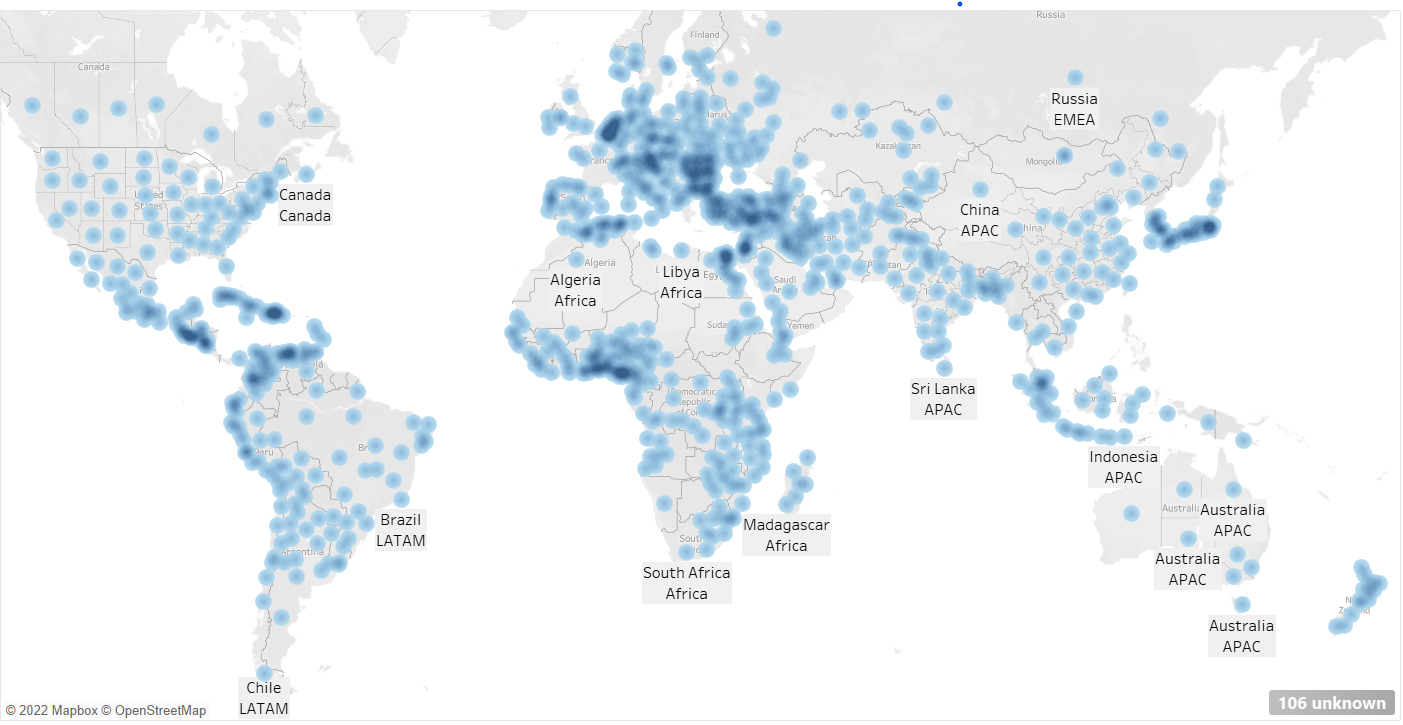

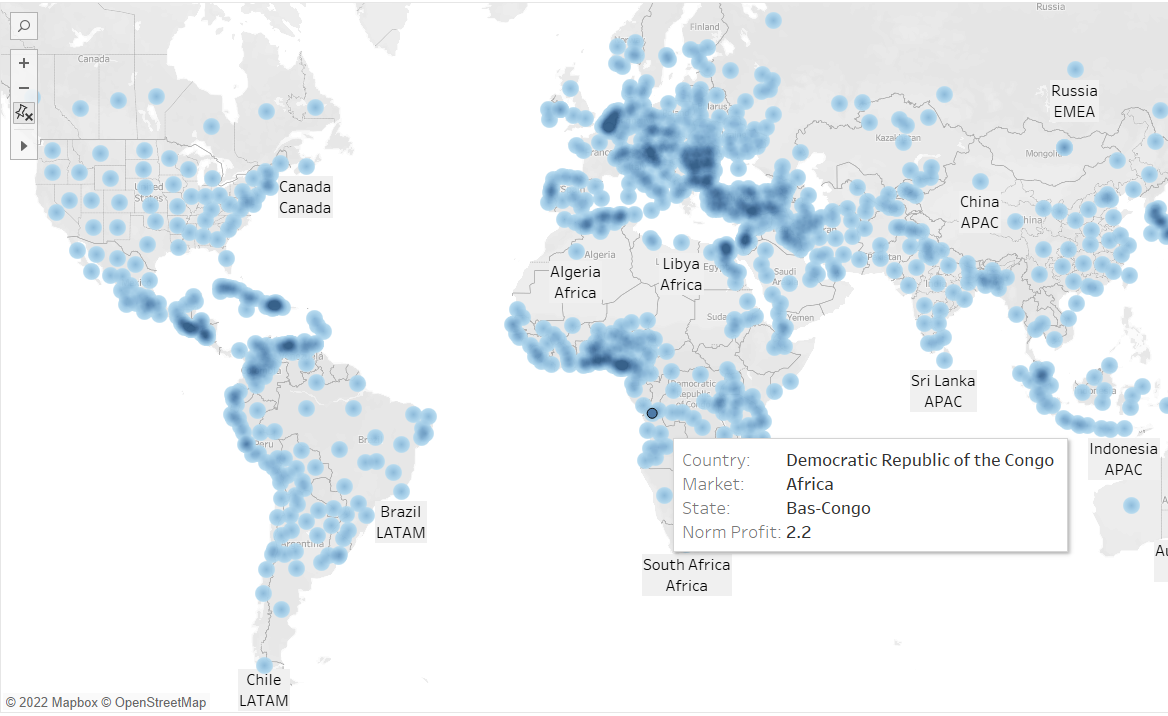

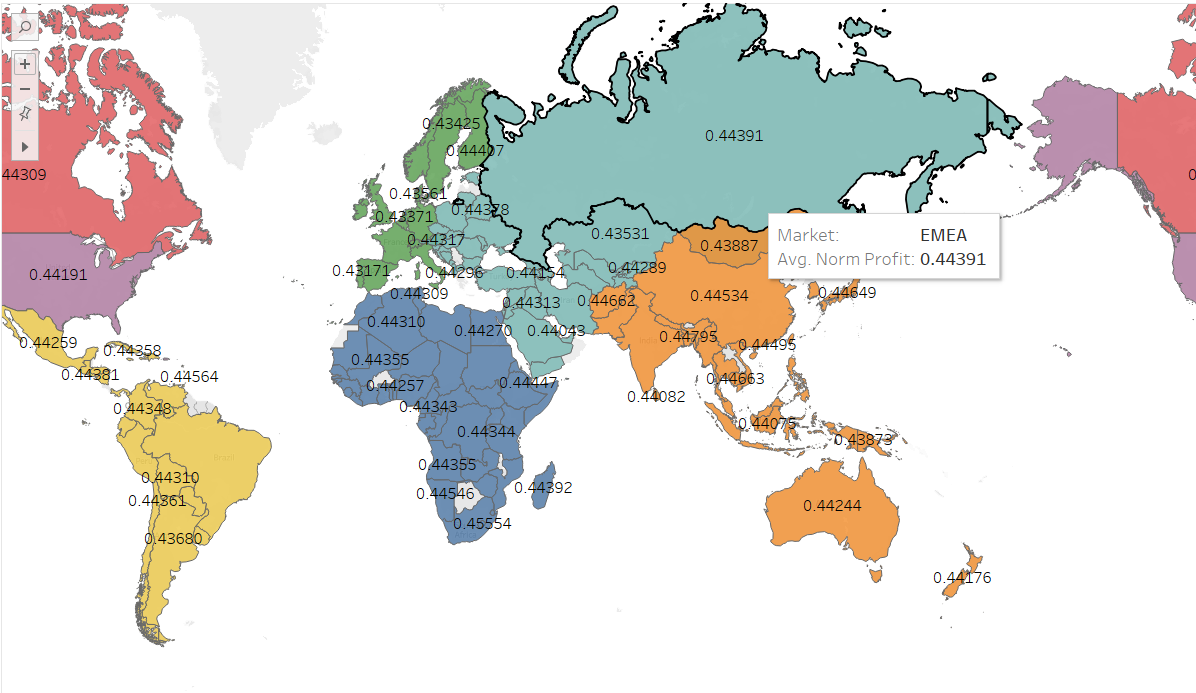

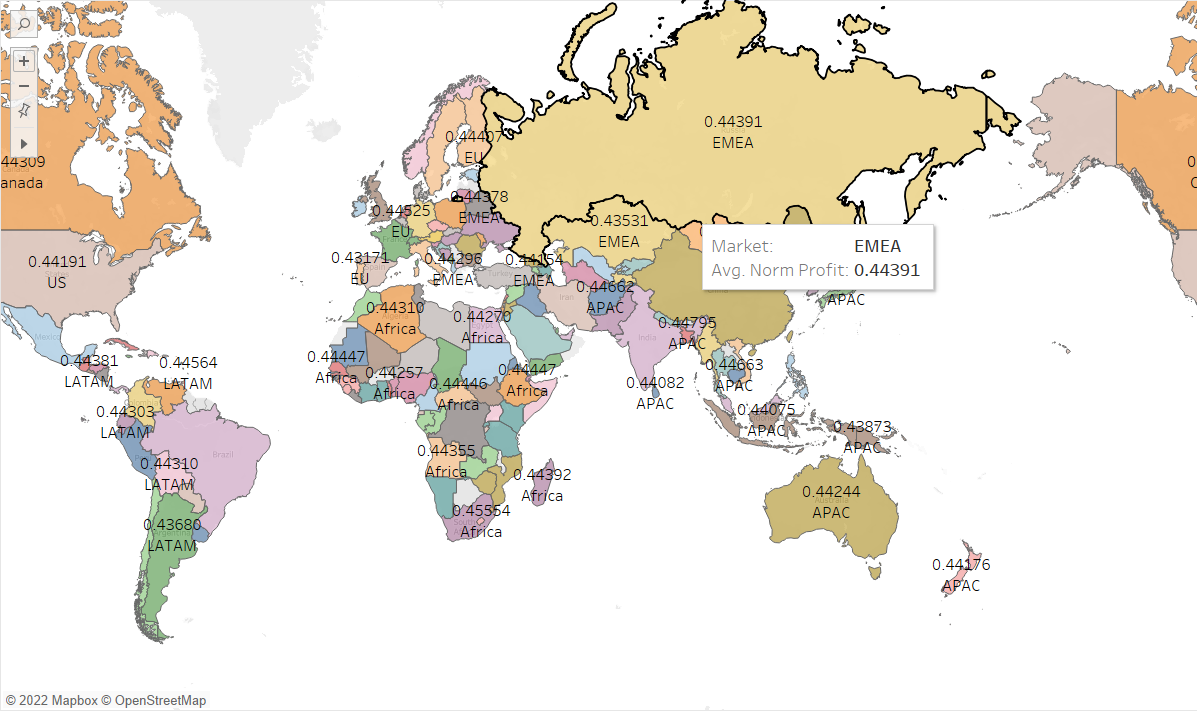

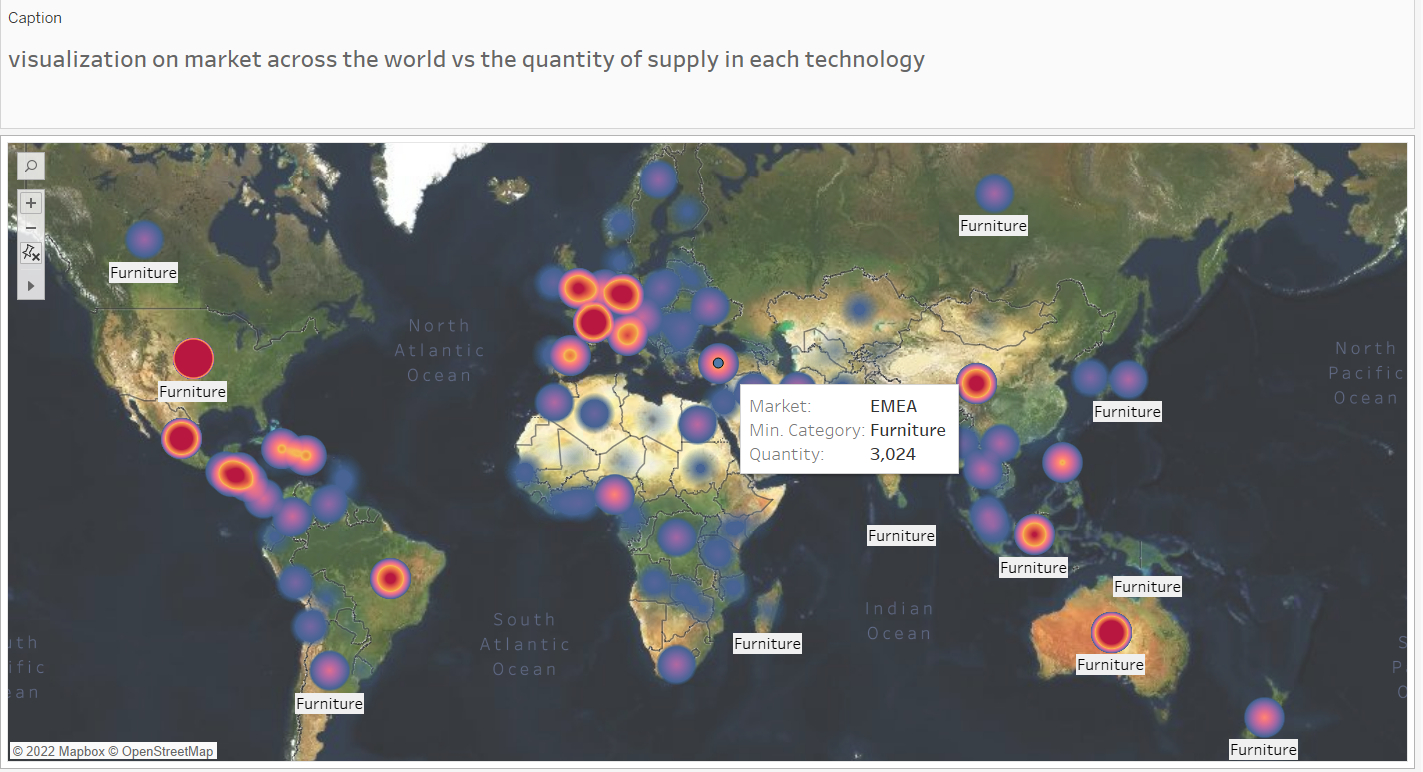

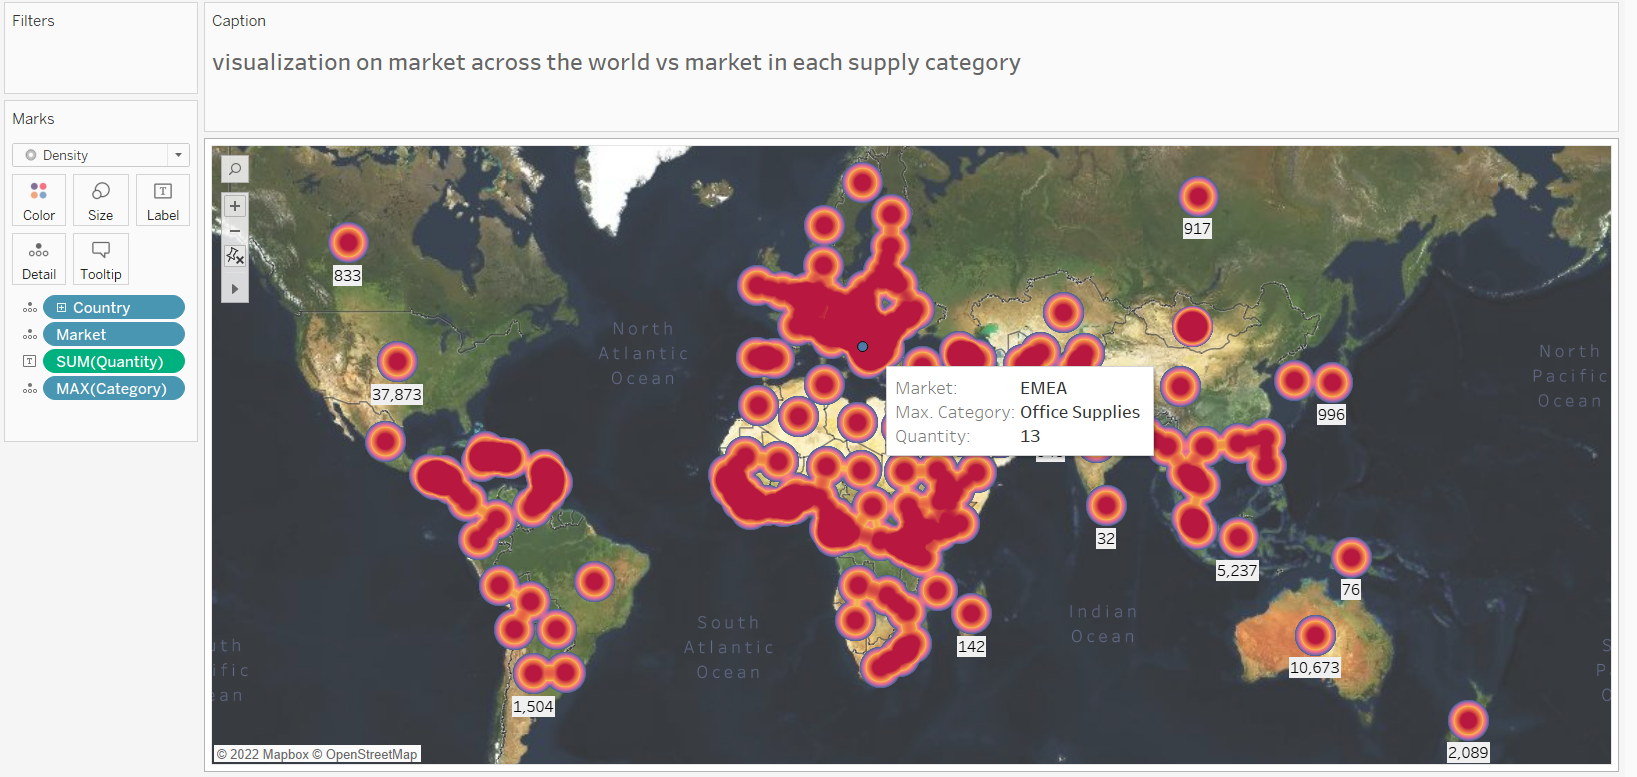

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_analysis['City']= label_encoder.fit_transform(df_analysis['City'])
df_analysis['Category']=label_encoder.fit_transform(df_analysis['Category'])

In [ ]:
df_analysis.head()

City  Category  Shipping Cost  Discount  Quantity  normProfit  normSales  \
0     0         0      47.675000       0.1        10    0.453206   0.034714   
1     0         1      20.887143       0.1        49    0.443363   0.006860   
2     0         2       3.510000       0.0         1    0.440966   0.002191   
3     1         0      81.970000       0.1         3    0.458867   0.043257   
4     2         0       4.030000       0.0         4    0.442136   0.002811   

   sucessrate  
0    0.091701  
1    0.017729  
2    0.005631  
3    0.115696  
4    0.007244

In [ ]:
df_analysis['City'].unique()

array([   0,    1,    2, ..., 3633, 3634, 3635])

In [ ]:
df_analysis['Category'].unique()

array([0, 1, 2])

In [ ]:
labels=df_analysis.columns[0:5]
print(labels)
l1=df_analysis.columns[-1]
X = df_analysis[labels]
y = df_analysis[l1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(labels,"~",l1)

Index(['City', 'Category', 'Shipping Cost', 'Discount', 'Quantity'], dtype='object')
Index(['City', 'Category', 'Shipping Cost', 'Discount', 'Quantity'], dtype='object') ~ sucessrate


**splitting data into train and test**

In [ ]:
X_train.shape, y_train.shape

((5655, 5), (5655,))

In [ ]:
X_test.shape, y_test.shape

((2424, 5), (2424,))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics as ms

**linear regression**

In [ ]:
#linear Regression Model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
print("LinearRegression")
y_pred=clf.predict(X_test)


LinearRegression


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.02
Mean squared error = 0.0
Median absolute error = 0.01
Explain variance score = 0.59
R2 score = 0.59


**Support Vector Regression Model**

In [ ]:
#Support Vector Regression Model
from sklearn.svm import SVC
clf = svm.SVR()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.08
Mean squared error = 0.01
Median absolute error = 0.08
Explain variance score = 0.4
R2 score = -1.39


In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
svr_linear.score(X_test,y_test)

-1.056340526939564

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

SVR()

In [ ]:
svr_rbf.score(X_test,y_test)

-1.2990928179817818

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))

RMSE for linear SVR: 0.07497613688258115
RMSE for RBF kernelized SVR: 0.07927820251748856


In [ ]:
#We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5,10,100],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 100],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
#Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=5)

In [ ]:
#check the estimator with data
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)
svr_best.score(X_test,y_test)
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

RMSE for RBF kernelized SVR: 0.3076620358172806


it is concluded that the SVR gives bad result

> Indented block



lasso reg

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

alpha=[1.0]
for i in alpha:
  model = model = linear_model.Lasso(alpha=i)
  #increase alpha's value to see which predictors are weak more clearly and thus reducing the dimensionality
  model.fit(X_train,y_train)
  predicted=model.predict(X_test)
  print("Mean squared error: %.2f"
                % mean_squared_error(y_test, predicted))
  print('R Square score: %.2f' % r2_score(y_test, predicted))
  print('Coefficients: \n', model.coef_)
  print('Intercept:\n',model.intercept_)

Mean squared error: 0.00
R Square score: 0.38
Coefficients: 
 [ 0.          0.          0.00034766 -0.         -0.        ]
Intercept:
 0.02464135405253141


ridge regressor

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model = linear_model.Ridge(alpha=100000.0)    # 0 to infinity
#model fit
model.fit(X_train,y_train)

predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

print('Coefficients: \n', model.coef_)
print('Intercept:\n',model.intercept_)

Mean squared error: 0.00
R Square score: 0.59
Coefficients: 
 [ 1.18764678e-07 -1.37654268e-06  7.58236733e-04 -2.83077167e-05
 -9.69287261e-06]
Intercept:
 0.010767157543308068


svr

In [ ]:
model = svm.SVR()

model.fit(X_train,y_train)

predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

Mean squared error: 0.01
R Square score: -1.39


In [ ]:
model = svm.SVR(kernel='linear')

model.fit(X_train,y_train)

predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

KeyboardInterrupt: ignored

In [ ]:
# polynomial with degree 4
model = svm.SVR(kernel='poly',degree=4)

model.fit(X_train,y_train)

predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

In [ ]:
#model creation
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha=0.01)
#alpha 0.001 to 0.01

#model fit
model.fit(X_train,y_train)
#prediction
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))
# The coefficients
print('Coefficients: \n', model.coef_)
print('Intercept:\n',model.intercept_)

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

Mean squared error: 0.00
R Square score: 0.61


decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae',max_depth=6,min_samples_leaf=7,min_samples_split=8)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.


DecisionTreeRegressor(criterion='mae', max_depth=6, min_samples_leaf=7,
                      min_samples_split=8)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))


Mean squared error: 0.00
R Square score: 0.59


RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, criterion='mse',max_depth=5,min_samples_split=4,
min_samples_leaf=3)

#n_estimators mean n forests
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.


RandomForestRegressor(criterion='mse', max_depth=5, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=200)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(y_test, predicted))
print('R Square score: %.2f' % r2_score(y_test, predicted))

Mean squared error: 0.00
R Square score: 0.61


[Text(0.5360169491525424, 0.9166666666666666, 'X[2] <= 54.365\nsquared_error = 0.002\nsamples = 3592\nvalue = 0.038'),
 Text(0.2711864406779661, 0.75, 'X[2] <= 21.598\nsquared_error = 0.0\nsamples = 2962\nvalue = 0.022'),
 Text(0.13559322033898305, 0.5833333333333334, 'X[2] <= 10.869\nsquared_error = 0.0\nsamples = 2031\nvalue = 0.013'),
 Text(0.06779661016949153, 0.4166666666666667, 'X[2] <= 5.586\nsquared_error = 0.0\nsamples = 1292\nvalue = 0.008'),
 Text(0.03389830508474576, 0.25, 'X[2] <= 3.164\nsquared_error = 0.0\nsamples = 680\nvalue = 0.005'),
 Text(0.01694915254237288, 0.08333333333333333, 'squared_error = 0.0\nsamples = 351\nvalue = 0.004'),
 Text(0.05084745762711865, 0.08333333333333333, 'squared_error = 0.0\nsamples = 329\nvalue = 0.007'),
 Text(0.1016949152542373, 0.25, 'X[2] <= 7.465\nsquared_error = 0.0\nsamples = 612\nvalue = 0.011'),
 Text(0.0847457627118644, 0.08333333333333333, 'squared_error = 0.0\nsamples = 229\nvalue = 0.009'),
 Text(0.11864406779661017, 0.083333

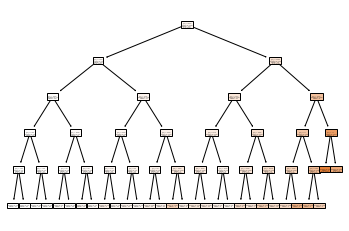

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[0],filled=True)

**CROSS VALIDATION**

In [ ]:
# Perform 6-fold cross validation
# Necessary imports:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(clf,X, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 203, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

ValueError: ignored